### **INITIALIZATION:**
- I use these three lines of code on top of my each notebooks because it will help to prevent any problems while reloading the same project. And the third line of code helps to make visualization within the notebook.

In [1]:
#@ INITIALIZATION: 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**DOWNLOADING LIBRARIES AND DEPENDENCIES:**
- I have downloaded all the libraries and dependencies required for the project in one particular cell.

In [3]:
#@ INSTALLING DEPENDENCIES: UNCOMMENT BELOW: 
# !pip install -Uqq fastbook
# import fastbook
# fastbook.setup_book()

In [4]:
#@ DOWNLOADING LIBRARIES AND DEPENDENCIES: 
from fastai.vision.all import *                         # Getting all the Libraries. 
from fastbook import *                                  # Getting all the Libraries. 
matplotlib.rc("image", cmap="Greys")                    # Initializing Dependencies. 

### **GETTING THE DATA:**
- I will download a sample of **MNIST**. 


In [5]:
#@ GETTING THE DATA: 
PATH = untar_data(URLs.MNIST_SAMPLE)                    # Path to the Dataset. 
PATH.ls()                                               # Inspecting Items. 

(#3) [Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train')]

In [6]:
#@ INSPECTING THE TRAINING SET:  
(PATH/"train").ls()                                     # Inspecting Items. 

(#2) [Path('/root/.fastai/data/mnist_sample/train/3'),Path('/root/.fastai/data/mnist_sample/train/7')]

In [7]:
#@ INSPECTING THE FOLDERS: 
threes = (PATH/"train"/"3").ls().sorted()               # Getting Same Order of Items. 
sevens = (PATH/"train"/"7").ls().sorted()               # Getting Same Order of Items. 
threes                                                  # Inspecting Items. 

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [8]:
#@ INSPECTING IMAGE: 
im3_path = threes[1]                                    # Path to the Image. 
im3 = Image.open(im3_path)                              # Getting an Image. 
im3

In [9]:
#@ CONVERTING INTO ARRAY: 
array(im3)[4:10, 4:10]                                  # Getting Numpy Array. 

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [10]:
#@ CONVERTING INTO ARRAY: 
tensor(im3)[4:10, 4:10]                                 # Getting a Tensor. 

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [11]:
#@ INSPECTING PIXELS: 
im3_t = tensor(im3)                                     # Getting a Tensor. 
df = pd.DataFrame(im3_t[4:15, 4:22])                    # Creating a DataFrame. 
df.style.set_properties(**{"font-size":"6pt"})\
        .background_gradient("Greys")                   # Inspecting the Image. 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


### **PIXEL SIMILARITY:**
- I will get the average of pixel values for each groups of 3 and 7. I will create a tensor containing all the 3s stacked together. 

In [12]:
#@ GETTING TENSOR VALUES: 
seven_tensors = [tensor(Image.open(o)) for o in sevens]         # Initializing Tensor Values. 
three_tensors = [tensor(Image.open(o)) for o in threes]         # Initializing Tensor Values. 
len(three_tensors), len(seven_tensors)                          # Inspecting Number of Tensors. 

(6131, 6265)

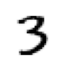

In [13]:
#@ INSPECTING A IMAGE: 
show_image(three_tensors[1]);                                   # Inspecting a Image. 

In [14]:
#@ GETTING STACKED TENSORS OF FLOATS: 
stacked_sevens = torch.stack(seven_tensors).float() / 255       # Getting Stacked Tensors. 
stacked_threes = torch.stack(three_tensors).float() / 255       # Getting Stacked Tesnors. 
stacked_threes.shape                                            # Inspecting Shape of Stack. 

torch.Size([6131, 28, 28])

In [15]:
#@ RANK OF TENSORS: 
len(stacked_threes.shape)                                       # Getting Rank of Tensor. 

3

In [16]:
#@ RANK OF TENSORS: 
stacked_threes.ndim                                # Getting Rank of Tensor. 

3

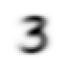

In [17]:
#@ MEAN OF IMAGE TENSORS: 
mean3 = stacked_threes.mean(0)                     # Getting Mean of Pixels. 
show_image(mean3);                                 # Inspecting the Mean. 

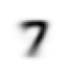

In [18]:
#@ MEAN OF IMAGE TENSORS:
mean7 = stacked_sevens.mean(0)                     # Getting Mean of Pixels. 
show_image(mean7);                                 # Inspecting the Mean. 

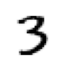

In [19]:
#@ GETTING SAMPLE IMAGE: 
a_3 = stacked_threes[1]                            # Getting an Element. 
show_image(a_3);                                   # Inspecting the Item. 

**Note:**
- Taking the mean of absolute value of differences is called **Mean Absolute Difference** or **L1 Norm**.
- Taking the mean of square of differences and then taking the square root is called **Root Mean Squared Error** or **L2 Norm**. 

In [20]:
#@ CALCULATING L1 NORM AND L2 NORM:
dist_3_abs = (a_3 - mean3).abs().mean()            # Getting L1 Norm. 
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()      # Getting L2 Norm. 
dist_3_abs, dist_3_sqr                             # Inspecting the Results. 

(tensor(0.1114), tensor(0.2021))

In [21]:
#@ CALCULATING L1 NORM AND L2 NORM: 
dist_7_abs = (a_3 - mean7).abs().mean()            # Getting L1 Norm. 
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()      # Getting L2 Norm. 
dist_7_abs, dist_7_sqr                             # Inspecting the Results. 

(tensor(0.1586), tensor(0.3021))

In [22]:
#@ CALCULATING L1 NORM AND L2 NORM: 
print(F.l1_loss(a_3.float(), mean7))               # Getting L1 Norm. 
print(F.mse_loss(a_3, mean7).sqrt())               # Getting L2 Norm. 

tensor(0.1586)
tensor(0.3021)


**ARRAYS AND TENSORS:**

In [23]:
#@ ARRAYS AND TENSORS: 
data = [[1, 2, 3], [4, 5, 6]]                      # Example List. 
arr = array(data)                                  # Creating Array. 
tns = tensor(data)                                 # Creating Tensor. 
arr, tns                                           # Inspecting the Results. 

(array([[1, 2, 3],
        [4, 5, 6]]), tensor([[1, 2, 3],
         [4, 5, 6]]))

### **COMPUTING METRICS USING BROADCASTING:**

In [24]:
#@ CREATING VALIDATION DATASET: 
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in \
                            (PATH/"valid"/"3").ls()])              # Creating Validation Tensors. 
valid_3_tens = valid_3_tens.float() / 255                          # Getting Normalized Tensors. 
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in \
                            (PATH/"valid"/"7").ls()])              # Creating Validation Tensors. 
valid_7_tens = valid_7_tens.float() / 255                          # Getting Normalized Tensors. 
valid_3_tens.shape, valid_7_tens.shape                             # Inspecting the Shape of Tensors. 

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [25]:
#@ FUNCTION FOR CALCULATING MAE: 
def mnist_distance(a, b):                                # Initializing Function. 
    return (a - b).abs().mean((-1, -2))                  # Getting MAE. 
mnist_distance(a_3, mean3)                               # Implementation of Function.                     

tensor(0.1114)

In [26]:
#@ IMPLEMENTATION OF MAE: 
valid_3_dist = mnist_distance(valid_3_tens, mean3)       # Initializing the Function. 
valid_3_dist, valid_3_dist.shape                         # Inspecting the Results. 

(tensor([0.1463, 0.1076, 0.1296,  ..., 0.1776, 0.1209, 0.1531]),
 torch.Size([1010]))

**Note:**
- I will use the function to figure out whether an image is a 3 by using the following logic: If the distance between the digit in a question and the ideal 3 is less than the distance to the ideal 7 then it's 3.

In [27]:
#@ DEFINING THE FUNCTION: 
def is_3(x):                                                        # Initializing the Function. 
    return mnist_distance(x, mean3) < mnist_distance(x, mean7)      # Inspecting Distance. 
is_3(a_3), is_3(a_3).float()                                        # Inspecting the Results. 

(tensor(True), tensor(1.))

In [28]:
#@ INSPECTING ACCURACY: 
accuracy_3s = is_3(valid_3_tens).float().mean()                     # Getting Accuracy. 
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()               # Getting Accuracy. 
accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s) / 2           # Getting Results. 

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

### **STOCHASTIC GRADIENT DESCENT:**

In [29]:
#@ GETTING GRADIENTS: 
def f(x):                                               # Initializing a Function. 
    return x**2 
xt = tensor(3.).requires_grad_()                        # Getting Gradients. 
yt = f(xt)                                              # Calculating Gradients. 
yt                                                      # Inspecting. 

tensor(9., grad_fn=<PowBackward0>)

In [30]:
#@ GETTING GRADIENTS: 
def f(x):                                               # Initializing a Function. 
    return (x**2).sum() 
xt = tensor([3., 4., 10.]).requires_grad_()             # Getting Gradients. 
yt = f(xt)                                              # Calculating Gradients. 
yt                                                      # Inspecting. 

tensor(125., grad_fn=<SumBackward0>)

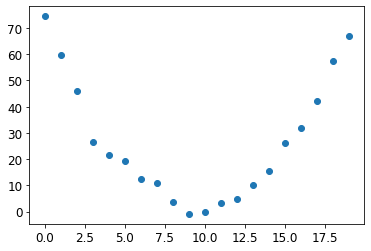

In [31]:
#@ STOCHASTIC GRADIENT DESCENT: 
time = torch.arange(0, 20).float(); time                # Initialization. 
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1      # Initialization. 
plt.scatter(time, speed);                               # Inspecting. 

In [32]:
#@ IMPLEMENTATION OF STOCHASTIC GRADIENT DESCENT: 
def f(t, params):                                       # Defining a Function. 
    a, b, c = params
    return a*(t**2) + (b*t) + c                         # Initializing a Quadratic Function. 

def mse(preds, targets):                                # Defining a Loss Function. 
    return ((preds - targets)**2).mean()                # Initializing MSE. 

**Step 1: Initialize the Parameters**
- I will initialize the parameters to random values and tell **PyTorch** to track the gradients. 

In [33]:
#@ INITIALIZING PARAMETERS: 
params = torch.randn(3).requires_grad_()                # Initializing Parameters. 
orig_params = params.clone()

**Step 2: Calculate the Predictions**
- Now I will calculate the predictions. 

In [34]:
#@ CALCULATING PREDICTIONS: 
preds = f(time, params)                                 # Implementation of Function. 

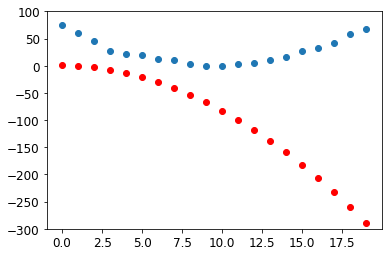

In [35]:
#@ INSPECTING PREDICTIONS: 
def show_preds(preds, ax=None):                         # Defining a Function. 
    if ax is None: ax=plt.subplots()[1]                 # Initialization. 
    ax.scatter(time, speed)                             # Scatter Plots. 
    ax.scatter(time, to_np(preds), color="red")         # Scatter Plots. 
    ax.set_ylim(-300, 100)
show_preds(preds)                                       # Implementation of Function. 

**Step 3: Calculate the Loss**
- I will calculate the loss here. 

In [36]:
#@ CALCULATING LOSS: 
loss = mse(preds, speed)                                 # Implementation of Function. 
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

**Step 4: Calculate the Gradients**
- The next step is to calculate the gradients or an approximation of how the parameters need to change. I will pick the learning rate to improve the predictions. 

In [37]:
#@ CALCULATING GRADIENTS: 
loss.backward()                                          # Initializing Backpropagation. 
params.grad                                              # Gradients. 
params.grad * 1e-5                                       # Gradients. 

tensor([-0.5320, -0.0342, -0.0025])

**Step 5: Step the Weights**
- I will update the parameters based on the gradients. 

In [38]:
#@ STEPPING THE WEIGHTS: 
lr = 1e-5                                               # Initializing Learning Rate. 
params.data -= lr * params.grad.data                    # Updating Parameters. 
params.grad = None

In [39]:
#@ INSPECTING LOSS: 
preds = f(time, params)                                 # Implementation of Function. 
mse(preds, speed)                                       # Getting Loss. 

tensor(5435.5356, grad_fn=<MeanBackward0>)

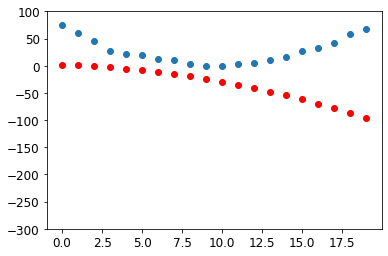

In [40]:
#@ INSPECTING PREDICTIONS: 
show_preds(preds)

**Step 6: Repeat the Process**
- I will define a function to repeat the above mentioned process a few times. 

In [41]:
#@ DEFINING THE FUNCTION: 
def apply_step(params, prn=True):                       # Defining the Function. 
    preds = f(time, params)                             # Getting Predictions. 
    loss = mse(preds, speed)                            # Getting Loss. 
    loss.backward()                                     # Initializing Backpropagation. 
    params.data -= lr * params.grad.data                # Updating Parameters. 
    params.grad = None
    if prn: print(loss.item())
    return preds

#@ IMPLEMENTATION OF FUNCTION: 
for i in range(10):
    apply_step(params)                                   # Repeating the Process. 

5435.53564453125
1577.44921875
847.3778076171875
709.2225341796875
683.0758056640625
678.1243896484375
677.1838989257812
677.0023803710938
676.9645385742188
676.9537353515625


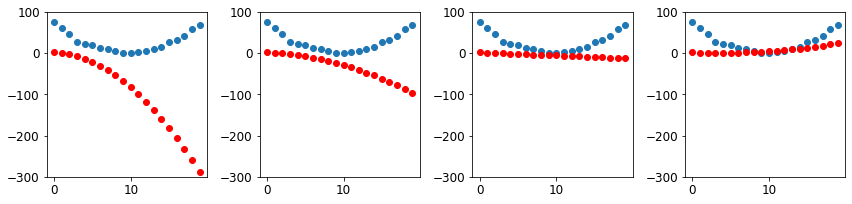

In [42]:
#@ INSPECTING THE PREDICTIONS: 
params = orig_params.detach().requires_grad_()
_, axs = plt.subplots(1, 4, figsize=(12, 3))             # Initialization. 
for ax in axs:
    show_preds(apply_step(params, False), ax)            # Inspecting Predictions. 
plt.tight_layout()

**Step 7: Stop**

### **MNIST LOSS FUNCTION:**
- I will concatenate all the images into a single tensor and change them from a list of matrices or **Rank 3** tensor to a list of vectors or **Rank 2** tensor. I will label 1 for 3s images and 0 for 7s images. 

In [43]:
#@ CREATING TRAINING DATASET: 
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)     # Initializing Concatenation. 
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)          # Creating Labels. 
train_x.shape, train_y.shape                                              # Inspecting Shape of Dataset. 

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [44]:
#@ CREATING TRAINING DATASET: 
dset = list(zip(train_x, train_y))                      # Creating Dataset. 
x, y = dset[0]
x.shape, y                                              # Inspecting Shape. 

(torch.Size([784]), tensor([1]))

In [45]:
#@ CREATING VALIDATION DATASET: 
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)         # Initializing Concatenation. 
valid_y=tensor([1]*len(valid_3_tens)+[0]*len(valid_7_tens)).unsqueeze(1)  # Creating Labels. 
valid_dset = list(zip(valid_x, valid_y))                                  # Creating Dataset. 

In [46]:
#@ INITIALIZING RANDOM WEIGHTS: 
def init_params(size, std=1.0):                                           # Initializing Function. 
    return (torch.randn(size) * std).requires_grad_()                     # Getting Gradients. 
weights = init_params((28*28, 1))                                         # Implementation of Function. 

**Note:**
- The function **weights*pixels** is not flexible. I will initialize a random number to intercept as well. In **Neural Networks** the equation **y=w*x+b**, w is called the **weights** and the b is called the **bias**. Together the weights and bias make up the parameters. 

In [47]:
#@ INITIALIZING BIAS:
bias = init_params(1)                                                     # Initializing Intercepts. 
(train_x[0]*weights.T).sum() + bias                                       # Inspecting Predictions. 

tensor([20.2336], grad_fn=<AddBackward0>)

In [48]:
#@ FUNCTION FOR MATRIX MULTIPLICATION: 
def linear1(xb):                                          # Initializing Function. 
    return xb@weights + bias                              # Initializing Matrix Multiplication. 
#@ IMPLEMENTATION: 
preds = linear1(train_x)                                  # Initializing Function. 
preds                                                     # Inspecting Predictions. 

tensor([[20.2336],
        [17.0644],
        [15.2384],
        ...,
        [18.3804],
        [23.8567],
        [28.6816]], grad_fn=<AddBackward0>)

In [49]:
#@ CALCULATING ACCURACY: 
corrects = (preds > 0.0).float() == train_y               # Getting Accuracy. 
corrects.float().mean().item()                            # Getting Accuracy. 

0.4912068545818329

In [50]:
#@ CALCULATING ACCURACY: 
with torch.no_grad():
    weights[0] *= 1.0001                                  # Changing Weights. 
preds = linear1(train_x)                                  # Getting Predictions. 
((preds > 0.0).float() == train_y).float().mean().item()  # Getting Accuracy. 

0.4912068545818329

In [51]:
#@ DEFINING LOSS FUNCTION: 
def mnist_loss(predictions, targets):                     # Initializing Function. 
    return torch.where(targets==1, 1-predictions, 
                       predictions).mean()                # Getting Mean of Distances. 

In [52]:
#@ INSPECTING THE IMPLEMENTATION: 
trgts = tensor([1, 0, 1])                                 # Initializing Tensor. 
prds = tensor([0.9, 0.4, 0.2])                            # Initializing Tensor. 
torch.where(trgts==1, 1-prds, prds)                       # Getting Loss. 

tensor([0.1000, 0.4000, 0.8000])

**SIGMOID FUNCTION:**
- The **Sigmoid** function always outputs a number between 0 and 1. 

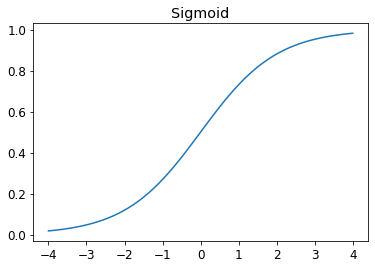

In [55]:
#@ INITIALIZING SIGMOID FUNCTION: 
def sigmoid(x):                                           # Defining Sigmoid Function. 
    return 1 / (1 + torch.exp(-x))

#@ INSPECTING SIGMOID FUNCTION: 
plot_function(torch.sigmoid, title="Sigmoid", min=-4, 
              max=4);                                     # Inspecting Function. 

In [54]:
#@ UPDATING LOSS FUNCTION: 
def mnist_loss(predictions, targets):                    # Initializing Loss Function. 
    predictions = predictions.sigmoid()                  # Initializing Sigmoid Function. 
    return torch.where(targets==1, 1-predictions, 
                       predictions).mean()               # Getting Mean of Losses. 

### **SGD AND MINIBATCHES:**
- The process to change or update the weights based on the gradients in order to consider some of the details involved in the next phase of the learning process is called an **Optimization Step**. The calculation of average loss for a few data items at a time is called a **Minibatch**. The number of data items in the **Minibatch** is called **Batchsize**. A larger **Batchsize** means more accurate and stable estimate of the dataset gradients from the loss function whereas a single **Batchsize** result in an imprecise and unstable gradient. 

In [56]:
#@ INITIALIZING DATALOADER: 
coll = range(15)                                        # Initialization. 
dl = DataLoader(coll, batch_size=5, shuffle=True)       # Initializing DataLoader. 
list(dl)                                                # Inspecting the Results. 

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

**Note:**
- A collection that contains the tuples of independent and dependent variables is known in **PyTorch** as a **Dataset**.

In [57]:
#@ IMPLEMENTATION OF DATALOADER: 
ds = L(enumerate(string.ascii_lowercase))               # Initializing a Dataset. 
dl = DataLoader(ds, batch_size=6, shuffle=True)         # Initializing DataLoader. 
list(dl)                                                # Inspecting the Results. 

[(tensor([17, 18, 10, 22,  8, 14]), ('r', 's', 'k', 'w', 'i', 'o')),
 (tensor([20, 15,  9, 13, 21, 12]), ('u', 'p', 'j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('h', 'z', 'g', 'f', 'l', 'x')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('b', 'd', 'a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

### **PUTTING ALL TOGETHER AND CONCLUSION:**


In [59]:
#@ INITIALIZING PARAMETERS: 
weights = init_params((28*28, 1))                       # Initializing Weights. 
bias = init_params(1)                                   # Initializing Bias. 

In [60]:
#@ INITIALIZING DATALOADER: TRAINING DATASET:
dl = DataLoader(dset, batch_size=256)                   # Initializing DataLoader. 
xb, yb = first(dl)                                      # Getting First Elements. 
xb.shape, yb.shape                                      # Inspecting the Shape. 

(torch.Size([256, 784]), torch.Size([256, 1]))

In [61]:
#@ INITIALIZING DATALOADER: VALIDATION DATASET:
valid_dl = DataLoader(valid_dset, batch_size=256)           # Initializing DataLoader. 
v_xb, v_yb = first(valid_dl)                                # Getting First Elements. 
v_xb.shape, v_yb.shape                                      # Inspecting the Shape. 

(torch.Size([256, 784]), torch.Size([256, 1]))

In [62]:
#@ CREATING MINBATCH FOR TESTING: 
batch = train_x[:4]                                     # Initialization. 
batch.shape                                             # Inspecting Shape. 

torch.Size([4, 784])

In [63]:
#@ GETTING PREDICTIONS: 
preds = linear1(batch); preds                           # Getting Predictions. 

tensor([[-2.1876],
        [-8.3973],
        [ 2.5000],
        [-4.9473]], grad_fn=<AddBackward0>)

In [64]:
#@ GETTING LOSS: 
loss = mnist_loss(preds, train_y[:4]); loss             # Getting Loss. 

tensor(0.7419, grad_fn=<MeanBackward0>)

In [65]:
#@ CALCULATING GRADIENTS: 
loss.backward()                                         # Backpropagation. 
weights.grad.shape, weights.grad.mean(), bias.grad      # Inspecting Gradients.

(torch.Size([784, 1]), tensor(-0.0061), tensor([-0.0420]))

In [69]:
#@ DEFINING THE FUNCTION: 
def calc_grad(xb, yb, model):                           # Defining Function. 
    preds = model(xb)                                   # Getting Predictions. 
    loss = mnist_loss(preds, yb)                        # Getting Loss. 
    loss.backward()                                     # Initializing Backpropagation. 

#@ IMPLEMENTATION OF FUNCTION: 
calc_grad(batch, train_y[:4], linear1)                  # Initializing the Function. 
weights.grad.mean(), bias.grad                          # Inspecting Weights and Bias. 

(tensor(-0.0243), tensor([-0.1680]))

In [70]:
#@ ZEROING GRADIENTS: 
weights.grad.zero_()                                    # Zeroing Weights. 
bias.grad.zero_();                                      # Zeroing Bias. 

In [72]:
#@ INITIALIZING BASIC TRAINING LOOP: 
def train_epoch(model, lr, params):                     # Initializing Training Function. 
    for xb, yb in dl: 
        calc_grad(xb, yb, model)                        # Calculating Gradients. 
        for p in params: 
            p.data -= p.grad * lr                       # Optimizing Parameters. 
            p.grad.zero_()                              # Zeroing Gradients. 

#@ DEFINING FUNCTION FOR ACCURACY: 
def batch_accuracy(xb, yb):                             # Initializing Function. 
    preds = xb.sigmoid()                                # Initializing Sigmoid. 
    correct = (preds > 0.5) == yb                       # Checking Predictions. 
    return correct.float().mean()                       # Getting Mean. 

#@ IMPLEMENTATION: 
batch_accuracy(batch, train_y[:4])                      # Getting Accuracy. 

tensor(0.2152)

In [73]:
#@ DEFINING THE FUNCTION: 
def validate_epoch(model):                                       # Initializing the Function. 
    accs = [batch_accuracy(model(xb), yb) for xb, yb in \
            valid_dl]                                            # Getting Accuracy. 
    return round(torch.stack(accs).mean().item(), 4)             # Getting Rounded Accuracy. 

#@ IMPLEMENTATION: 
validate_epoch(linear1)                                          # Implementation of Function. 

0.5265

In [74]:
#@ TRAINING AND EVALUATION: ONE EPOCH: 
lr = 1.                                                 # Initializing LR.
params = weights, bias                                  # Initializing Weights and Bias. 
train_epoch(linear1, lr, params)                        # Initializing Training. 
validate_epoch(linear1)                                 # Evaluation. 

0.6664

In [75]:
#@ TRAINING AND EVALUATION: 20 EPOCH:  
for i in range(20):
    train_epoch(linear1, lr, params)                     # Initializing Training. 
    print(validate_epoch(linear1), end=(" "))            # Evaluation. 

0.8265 0.89 0.9183 0.9276 0.9398 0.9466 0.9505 0.9524 0.9559 0.9578 0.9598 0.9608 0.9612 0.9617 0.9632 0.9637 0.9647 0.9656 0.9671 0.9676 